<a href="https://colab.research.google.com/github/HKcode22/DataVisualization-CS133/blob/main/CS133_Assignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install seaborn pandas matplotlib


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
sns.set(style="whitegrid") # setting a better seaborn style aesthetics

wine = "https://gist.githubusercontent.com/clairehq/79acab35be50eaf1c383948ed3fd1129/raw/407a02139ae1e134992b90b4b2b8c329b3d73a6a/winemag-data-130k-v2.csv"

winedf = pd.read_csv(wine, index_col=0) #loading dataset into pandas dataframe

winedf.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [4]:
print("Missing values in each column: ")
print(winedf.isnull().sum())

#droppinh rows with missing values
wineclean= winedf.dropna(subset=['points', 'price', 'variety', 'country', 'province'])
wineclean.reset_index(drop=True, inplace=True) #reset index after dropping rows

wineclean.head()

Missing values in each column: 
country                     32
description                  0
designation              18911
points                       0
price                     4670
province                    32
region_1                 10755
region_2                 40329
taster_name              13643
taster_twitter_handle    16032
title                        0
variety                      0
winery                       0
dtype: int64


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
1,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
2,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
3,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
4,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem


<Figure size 1000x600 with 0 Axes>

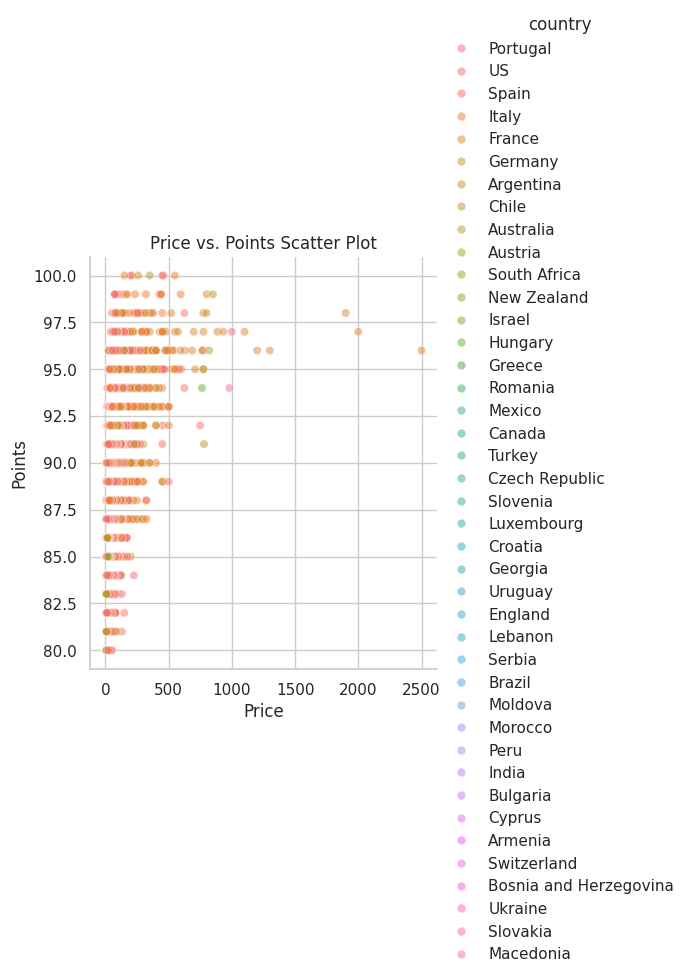

In [6]:
#scatter plot of price vs points
plt.figure(figsize=(10, 6))
sns.relplot(data=wineclean, x='price', y='points', hue='country', alpha=0.5)
plt.title('Price vs. Points Scatter Plot')
plt.xlabel('Price')
plt.ylabel('Points')
plt.show()

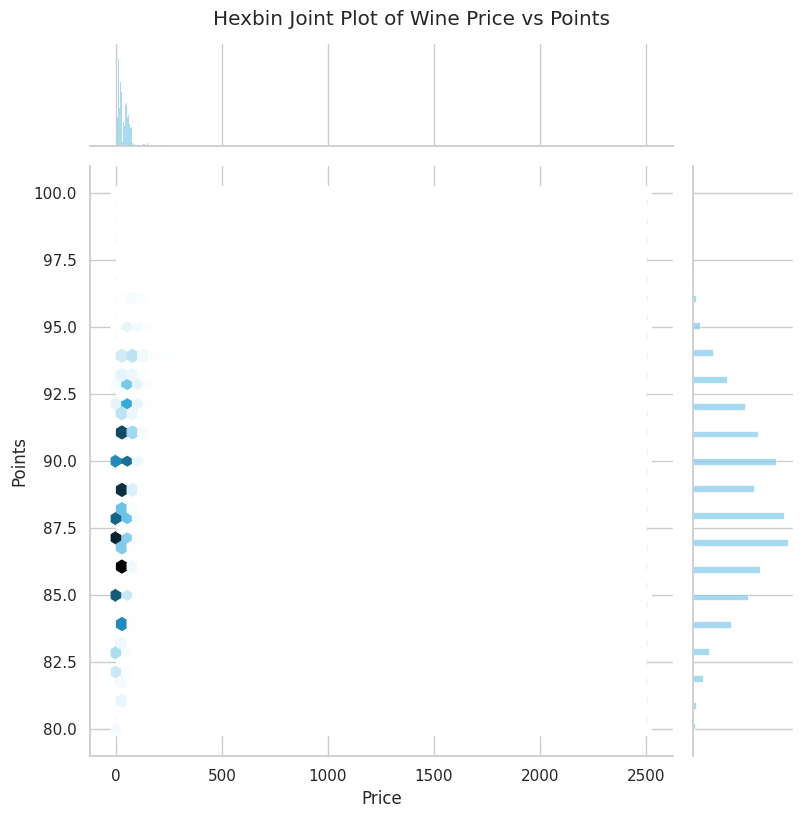

In [14]:
# Hexbin joint plot of Points vs Price
sns.jointplot(
    data=wineclean,
    x="price",
    y="points",
    kind="hex",
    height=8,
    color="skyblue"
)
plt.suptitle('Hexbin Joint Plot of Wine Price vs Points', y=1.02)
plt.xlabel('Price')
plt.ylabel('Points')
plt.show()


<ipython-input-15-39d74b29e8e3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(


<Figure size 1200x800 with 0 Axes>

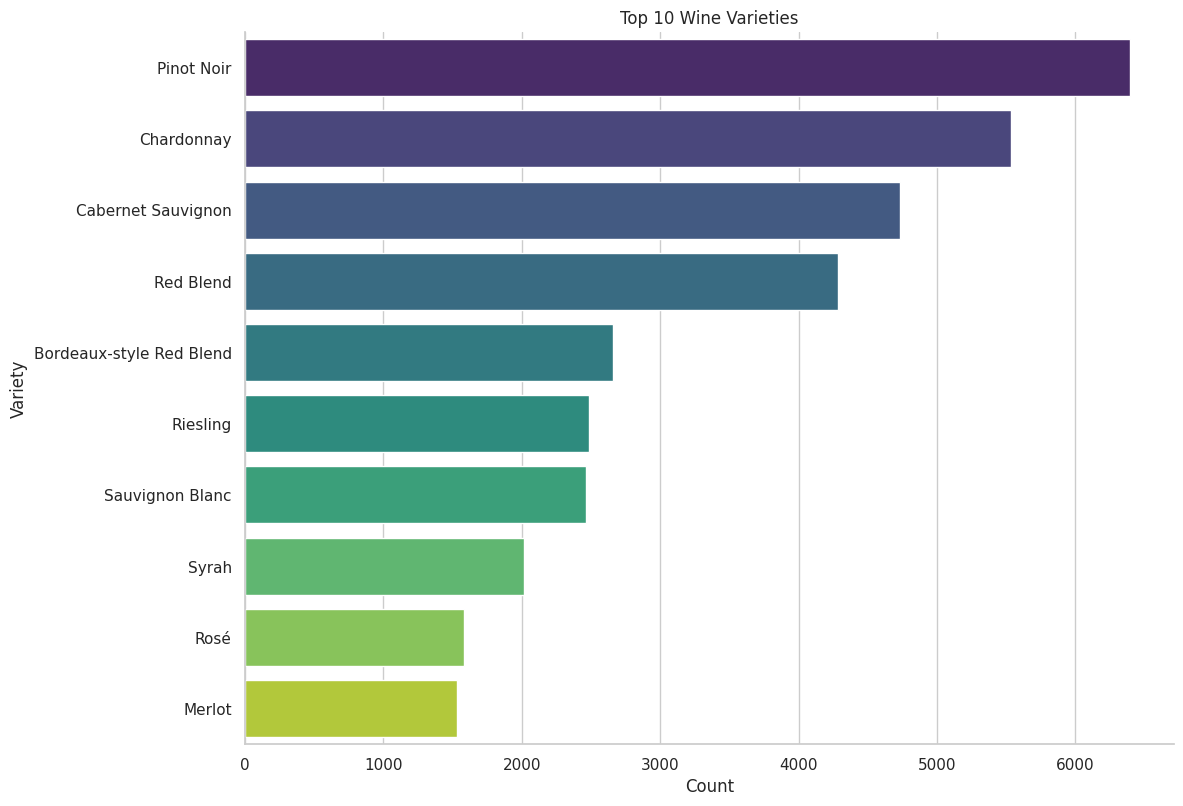

In [15]:
#bar plot of top 10 wine varieties
plt.figure(figsize=(12,8))
sns.catplot(
    y='variety',
    kind='count',
    data=wineclean,
    height=8,
    aspect=1.5,
    order=wineclean['variety'].value_counts().head(10).index[:10],
    palette='viridis'
)

plt.title('Top 10 Wine Varieties')
plt.xlabel('Count')
plt.ylabel('Variety')
plt.show()